In [15]:
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
vid = cv2.VideoCapture(0)

if(vid.isOpened() == False):
    print('Error opening video stream or file')

img = []
while(vid.isOpened()):
    ret, img = vid.read()
    if ret == True:
        img = img[100:1000, 600:1500]
        cv2.imwrite("screenshot.jpg", img)
        break

In [17]:
import matplotlib.pyplot as plt
img = cv.imread('screenshot.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
imask = mask>0
green_points = []
for i in range(len(imask)):
    for j in range(len(imask[0])):
        if imask[i][j]:
            green_points.append([i, j])
green_points = np.array(green_points)
kmeans = KMeans(n_clusters=4, random_state=0).fit(green_points)
kmeans.cluster_centers_

array([[112.07194245,  54.73381295],
       [710.52302632, 723.02960526],
       [717.38910506,  30.16731518],
       [ 97.48847926, 693.93087558]])

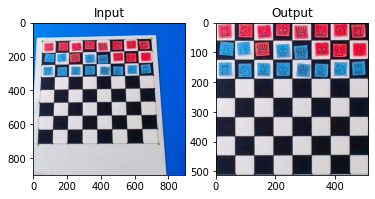

In [19]:
import matplotlib.pyplot as plt
img = cv.imread('screenshot.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[58, 116], [698, 102], [28, 718], [739, 718]])
pts2 = np.float32([[0,0],[512,0],[0,512],[512,512]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(512,512))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

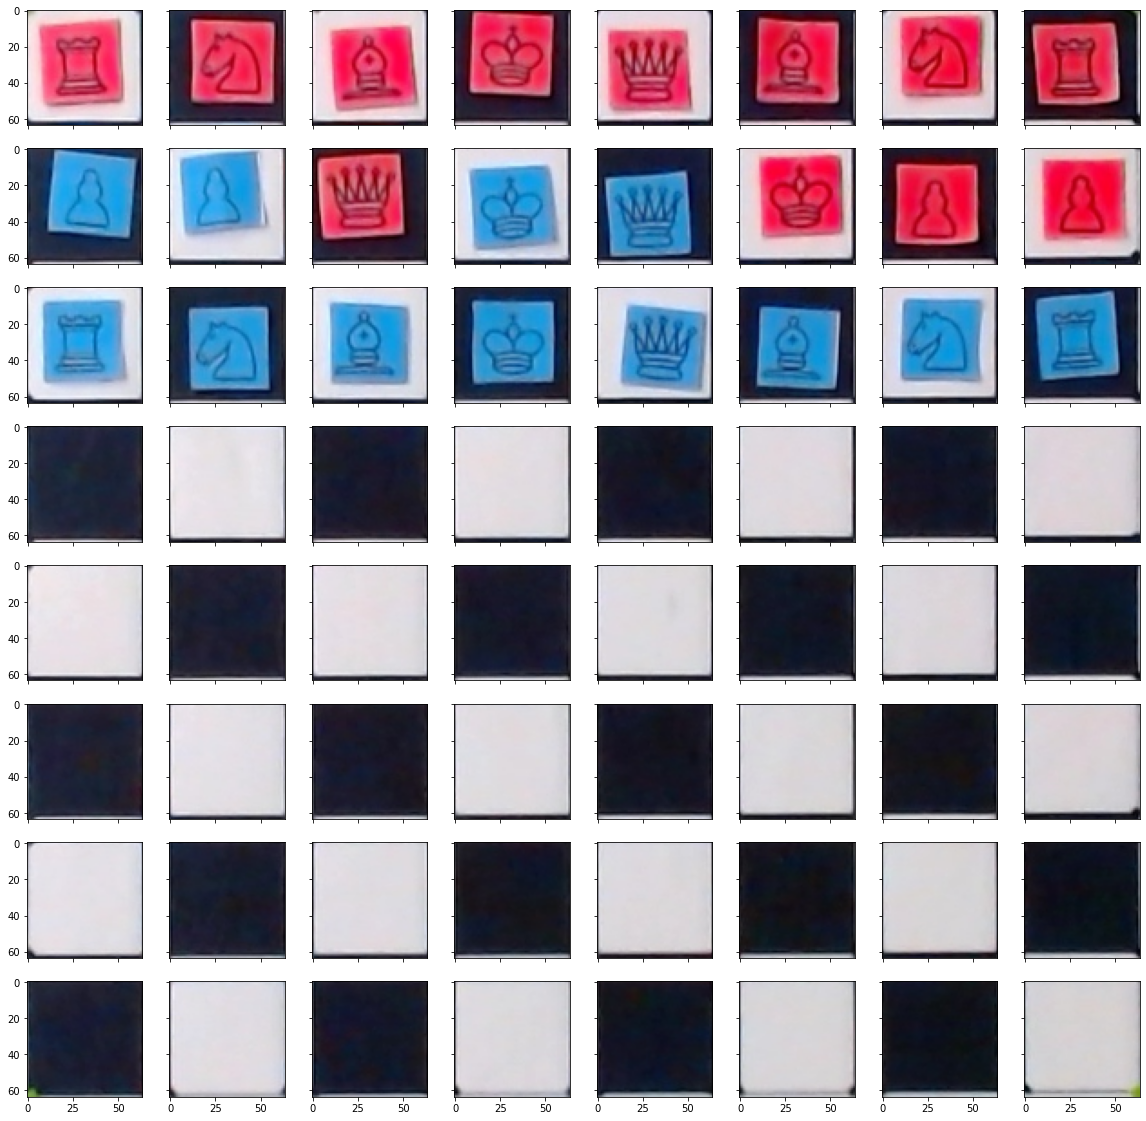

In [21]:
from PIL import Image


fig, axes = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True, figsize=(20,20))

for i in range(8):
    for j in range(8):
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        Image.fromarray(img2).save('dataset/{0}__{1}.jpg'.format(i, j))
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        axes[i][j].imshow(img2)